In [1]:
import pandas as pd
import numpy as np

In [2]:
# read csv files for wind turbine locations 2022
#df_loc_2022 = pd.read_csv('wind_turbine_20220114.csv')

# read csv files for wind turbine locations 2023
df_loc_2021 = pd.read_csv('Use this dataset/uswtdb_v5_0_20220427.csv', encoding='latin-1')

# read excel file for energy production 2020
#df_energy_2020 = pd.read_excel(r"C:\Users\danie\Downloads\EIA923_Schedules_2_3_4_5_M_12_2020_Final_Revision.xlsx", 
                          #sheet_name='Page 1 Generation and Fuel Data')

# read excel file for energy production 2023
df_energy_2021 = pd.read_excel('2023 Dataset/EIA923_Schedules_2_3_4_5_M_12_2021_Final_Revision.xlsx',
                            sheet_name='Page 1 Generation and Fuel Data', header=5)

In [55]:
print(len(df_loc_2022))
print(len(df_loc_2023))
print(len(df_energy_2020))
print(len(df_energy_2021))

70808
72669
15115
15796


In [21]:
df_loc_2023.columns

Index(['case_id', 'faa_ors', 'faa_asn', 'usgs_pr_id', 'eia_id', 't_state',
       't_county', 't_fips', 'p_name', 'p_year', 'p_tnum', 'p_cap', 't_manu',
       't_model', 't_cap', 't_hh', 't_rd', 't_rsa', 't_ttlh', 'retrofit',
       'retrofit_year', 't_conf_atr', 't_conf_loc', 't_img_date', 't_img_srce',
       'xlong', 'ylat'],
      dtype='object')

In [29]:
df_energy_2021.columns

Index(['Plant Id', 'Combined Heat And\nPower Plant', 'Nuclear Unit Id',
       'Plant Name', 'Operator Name', 'Operator Id', 'Plant State',
       'Census Region', 'NERC Region', 'Reserved', 'NAICS Code',
       'EIA Sector Number', 'Sector Name', 'Reported\nPrime Mover',
       'Reported\nFuel Type Code', 'AER\nFuel Type Code',
       'Balancing\nAuthority Code', 'Reserved.1', 'Physical\nUnit Label',
       'Quantity\nJanuary', 'Quantity\nFebruary', 'Quantity\nMarch',
       'Quantity\nApril', 'Quantity\nMay', 'Quantity\nJune', 'Quantity\nJuly',
       'Quantity\nAugust', 'Quantity\nSeptember', 'Quantity\nOctober',
       'Quantity\nNovember', 'Quantity\nDecember', 'Elec_Quantity\nJanuary',
       'Elec_Quantity\nFebruary', 'Elec_Quantity\nMarch',
       'Elec_Quantity\nApril', 'Elec_Quantity\nMay', 'Elec_Quantity\nJune',
       'Elec_Quantity\nJuly', 'Elec_Quantity\nAugust',
       'Elec_Quantity\nSeptember', 'Elec_Quantity\nOctober',
       'Elec_Quantity\nNovember', 'Elec_Quantity\

In [92]:
# merge dataframes df_loc_2023 and df_energy_2022
df_merge_2023 = pd.merge(df_loc_2023, df_energy_2021[(df_energy_2021['Reported\nPrime Mover']=='WT') | (df_energy_2021['Reported\nPrime Mover']=='WS')], left_on='eia_id', right_on='Plant Id', how='left')

In [90]:
df_merge_2023 = pd.merge(df_loc_2023, df_energy_2021, left_on='eia_id', right_on='Plant Id', how='left')

In [94]:
df_merge_2023.isna().sum()

case_id                                    0
faa_ors                                 5359
faa_asn                                 5132
usgs_pr_id                             34765
eia_id                                  4322
                                       ...  
Electric Fuel Consumption\nQuantity     6598
Total Fuel Consumption\nMMBtu           6598
Elec Fuel Consumption\nMMBtu            6598
Net Generation\n(Megawatthours)         6598
YEAR                                    6598
Length: 124, dtype: int64

In [95]:
# export merged dataframe to csv
df_merge_2023.to_csv(r"C:\Users\danie\Downloads\sprint\merged.csv", index=False)

In [98]:
# number of null values contributed by null eia_id values
# reason for null eia_id values: retired wind turbines
len(df_loc_2023[df_loc_2023['eia_id'].isna()])

4322

In [99]:
# number of null values contributed by value not found in dataset energy_2021
# reason for null values: engergy_2021 does not contain data for 2022 and 2023
len(df_merge_2023[(df_merge_2023['eia_id'].notna()) & (df_merge_2023['YEAR'].isna())])

2276

In [100]:
# number of turbines online after 2021
len(df_loc_2023[df_loc_2023['p_year']>2021])

2395

In [105]:
# get unique id from energy_2021
id_energy = df_energy_2021['Plant Id'][(df_energy_2021['Reported\nPrime Mover']=='WT') | (df_energy_2021['Reported\nPrime Mover']=='WS')].unique()
len(id_energy)

1279

In [166]:
# find if 65059 in id_energy
65059 in id_loc



True

In [106]:
# get unique id form loc_2023
id_loc = df_loc_2023['eia_id'].unique()
len(id_loc)

1256

In [107]:
# find the list of plant_id that are present in id_energy but not in loc_2023
id_missing = np.setdiff1d(id_energy, id_loc)

# 88 plant id in energy_2021 are not present in loc_2023
len(id_missing)

88

In [108]:
# filter the dataframe from energy_2021 to get the missing id
df_missing = df_energy_2021[df_energy_2021['Plant Id'].isin(id_missing) & (df_energy_2021['Reported\nPrime Mover']=='WT') | (df_energy_2021['Reported\nPrime Mover']=='WS')]

In [110]:
# export missing dataframe to csv
df_missing.to_csv(r"C:\Users\danie\Downloads\sprint\missing.csv", index=False)

In [116]:
import difflib

In [205]:
# filter out the null values in eia_id
df_loc_2023_null = df_loc_2023[df_loc_2023['eia_id'].isna()]
len(df_loc_2023_null)

4311

In [216]:
#create duplicate column to retain team name from df2
df_loc_2023_null['Plant Name missing'] = df_loc_2023_null['p_name']
df_loc_2023_null['Plant Name all'] = df_loc_2023_null['p_name']

c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [217]:
# match df_loc_2023 null in eia_id with df_missing(in energy_2021 but not in loc_2023)
df_loc_2023_null['Plant Name missing'] = df_loc_2023_null['Plant Name missing'].apply(lambda x: (difflib.get_close_matches(x, df_missing['Plant Name'])[:1] or [None])[0])
len(df_loc_2023_null)

In [224]:
df_860_2021 = pd.read_excel(r"C:\Users\danie\Downloads\sprint\eia8602021\3_2_Wind_Y2021.xlsx", 
                          sheet_name='Operable', header=1)
# match df_loc_2023 null in eia_id with df_missing(in energy_2021 but not in loc_2023)
df_loc_2023_null['Plant Name all'] = df_loc_2023_null['Plant Name all'].apply(lambda x: (difflib.get_close_matches(x, df_860_2021['Plant Name'])[:1] or [None])[0])
len(df_loc_2023_null)

c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


4311

In [225]:
# export df_loc_2023_null to investigate
df_loc_2023_null.to_csv(r"C:\Users\danie\Downloads\sprint\difflib2.csv", index=False)

In [189]:
df_loc_2023['eia_id'].isna().sum()

4321

In [285]:
index = df_loc_2023[(df_loc_2023['p_name']=='TAC-Distributed Wind') & (df_loc_2023['eia_id'].isna())].index
print(index)
df_loc_2023[(df_loc_2023['p_name']=='TAC-Distributed Wind') & (df_loc_2023['eia_id'].isna())]

Int64Index([61933], dtype='int64')


,case_id,faa_ors,faa_asn,usgs_pr_id,eia_id,t_state,t_county,t_fips,p_name,p_year,...,t_ttlh,retrofit,retrofit_year,t_conf_atr,t_conf_loc,t_img_date,t_img_srce,xlong,ylat,Plant Name
61933,3056656,17-062248,2016-WTE-7778-OE,NaN,NaN,IL,Champaign County,17019,TAC-Distributed Wind,2017.0,...,NaN,0,NaN,2,3,7/8/2016,Digital Globe,-88.244324,40.088814,TAC-Distributed Wind


In [287]:
# filter out row with p_name similar to Glenrock
df_loc_2023[df_loc_2023['p_name'].str.contains('UL Advanced Wind Turbine Test Facility')]


,case_id,faa_ors,faa_asn,usgs_pr_id,eia_id,t_state,t_county,t_fips,p_name,p_year,...,t_ttlh,retrofit,retrofit_year,t_conf_atr,t_conf_loc,t_img_date,t_img_srce,xlong,ylat,Plant Name
65325,3083551,48-136706,2017-WTW-5295-OE,NaN,61589.0,TX,Randall County,48381,UL Advanced Wind Turbine Test Facility,2018.0,...,198.1,0,NaN,3,3,8/17/2019,Digital Globe,-101.790001,34.967331,UL Advanced Wind Turbine Test Facility
65326,3085848,NaN,NaN,NaN,NaN,TX,Randall County,48381,UL Advanced Wind Turbine Test Facility,2015.0,...,46.9,0,NaN,1,3,5/2/2017,Digital Globe,-101.789894,34.969849,UL Advanced Wind Turbine Test Facility


In [286]:
df_energy_2021[df_energy_2021['Plant Name']=='UL Advanced Wind Turbine Test Facility']

,Plant Id,Combined Heat And\nPower Plant,Nuclear Unit Id,Plant Name,Operator Name,Operator Id,Plant State,Census Region,NERC Region,Reserved,...,Netgen\nSeptember,Netgen\nOctober,Netgen\nNovember,Netgen\nDecember,Total Fuel Consumption\nQuantity,Electric Fuel Consumption\nQuantity,Total Fuel Consumption\nMMBtu,Elec Fuel Consumption\nMMBtu,Net Generation\n(Megawatthours),YEAR
12778,61589,N,.,UL Advanced Wind Turbine Test Facility,West Texas A&M University,61188,TX,WSC,MRO,NaN,...,494.28,615.588,600.871,682.444,0,0,62420,62420,7058.0,2021


In [288]:
# set cell value in df_loc_2023 with the value in df_energy_2021
df_loc_2023.loc[13764,'eia_id'] =  \
df_energy_2021[df_energy_2021['Plant Name']=='Coastal Virginia Offshore Wind (CVOW) pilot project']['Plant Id'].values[0] 

df_loc_2023.loc[55987:55989,'eia_id'] =  \
df_energy_2021[df_energy_2021['Plant Name']=='Sand Point']['Plant Id'].values[0] 

df_loc_2023.loc[64373:64381,'eia_id'] =  \
df_energy_2021[df_energy_2021['Plant Name']=='Tuana Springs']['Plant Id'].values[0] 

df_loc_2023.loc[281,'eia_id'] =  \
df_energy_2021[df_energy_2021['Plant Name']=='Allegheny Ridge Wind Farm']['Plant Id'].values[0] 

df_loc_2023.loc[1173,'eia_id'] =  \
df_energy_2021[df_energy_2021['Plant Name']=='Armadillo Flats Wind Project, LLC']['Plant Id'].values[0] 

df_loc_2023.loc[[16240, 16246, 16260, 16284, 16290],'eia_id'] =  \
df_energy_2021[df_energy_2021['Plant Name']=='Diamond Spring, LLC']['Plant Id'].values[0] 

df_loc_2023.loc[[20426, 20459],'eia_id'] =  \
df_energy_2021[df_energy_2021['Plant Name']=='Foard City Wind']['Plant Id'].values[0] 

df_loc_2023.loc[22070,'eia_id'] =  \
df_energy_2021[df_energy_2021['Plant Name']=='Glenrock']['Plant Id'].values[0]

df_loc_2023.loc[22070,'eia_id'] = 63710

df_loc_2023.loc[[33652, 33656, 33670, 33678, 33698, 33714, 33723, 33739, 33745, 33763 ],'eia_id'] =  \
df_energy_2021[df_energy_2021['Plant Name']=='Las Majadas Wind Farm']['Plant Id'].values[0]

df_loc_2023.loc[[42817, 42819, 42852],'eia_id'] =  \
df_energy_2021[df_energy_2021['Plant Name']=='Niyol Wind, LLC']['Plant Id'].values[0]

df_loc_2023.loc[48795,'eia_id'] =  57291

df_loc_2023.loc[[55654, 55670, 55692],'eia_id'] =  \
df_energy_2021[df_energy_2021['Plant Name']=='San Gorgonio Farms Wind Farm']['Plant Id'].values[0]

df_loc_2023.loc[61933,'eia_id'] =  \
df_energy_2021[df_energy_2021['Plant Name']=='TAC-Distributed Energy Resource Hybrid']['Plant Id'].values[0]

df_loc_2023.loc[65326,'eia_id'] =  \
df_energy_2021[df_energy_2021['Plant Name']=='UL Advanced Wind Turbine Test Facility']['Plant Id'].values[0]


In [187]:
df_energy_2021[df_energy_2021['Plant Name']=='Coastal Virginia Offshore Wind (CVOW) pilot project']['Plant Id'].values[0] 

59693

In [295]:
df_loc_2023['eia_id'].isna().sum()

4283

In [221]:
df_energy_2021.head()

,Plant Id,Combined Heat And\nPower Plant,Nuclear Unit Id,Plant Name,Operator Name,Operator Id,Plant State,Census Region,NERC Region,Reserved,...,Netgen\nSeptember,Netgen\nOctober,Netgen\nNovember,Netgen\nDecember,Total Fuel Consumption\nQuantity,Electric Fuel Consumption\nQuantity,Total Fuel Consumption\nMMBtu,Elec Fuel Consumption\nMMBtu,Net Generation\n(Megawatthours),YEAR
0,1,N,.,Sand Point,"TDX Sand Point Generating, LLC",63560,AK,PACN,NaN,NaN,...,305.071,303.095,236.655,263.077,6071,6071,35490,35490,2729.0,2021
1,1,N,.,Sand Point,"TDX Sand Point Generating, LLC",63560,AK,PACN,NaN,NaN,...,13.051,13.182,7.49,13.764,0,0,1184,1184,134.0,2021
2,2,N,.,Bankhead Dam,Alabama Power Co,195,AL,ESC,SERC,NaN,...,14139.512,14509.501,17005.425,21850.979,0,0,1905404,1905404,215446.0,2021
3,3,N,.,Barry,Alabama Power Co,195,AL,ESC,SERC,NaN,...,168852,218962,239159,215057,606684,606684,615384,615384,2704852.0,2021
4,3,N,.,Barry,Alabama Power Co,195,AL,ESC,SERC,NaN,...,326341,415733,444712,411216,54097499,54097499,54874030,54874030,5222203.0,2021


In [222]:
len(df_loc_2023_null)

4311

In [291]:
# filter out plant id with more than 1 row from energy_2021 and at least 1 row from 'Reported\nPrime Mover' is 'WT' 
df_hybrid = df_energy_2021[df_energy_2021['Plant Id'].duplicated(keep=False)].sort_values('Plant Id')
df_hybrid_wt_ws = df_hybrid[df_hybrid['Reported\nPrime Mover'].isin(['WT','WS'])]
df_hybrid = df_hybrid[df_hybrid['Plant Id'].isin(df_hybrid_wt_ws['Plant Id'])]
df_hybrid

,Plant Id,Combined Heat And\nPower Plant,Nuclear Unit Id,Plant Name,Operator Name,Operator Id,Plant State,Census Region,NERC Region,Reserved,...,Netgen\nSeptember,Netgen\nOctober,Netgen\nNovember,Netgen\nDecember,Total Fuel Consumption\nQuantity,Electric Fuel Consumption\nQuantity,Total Fuel Consumption\nMMBtu,Elec Fuel Consumption\nMMBtu,Net Generation\n(Megawatthours),YEAR
0,1,N,.,Sand Point,"TDX Sand Point Generating, LLC",63560,AK,PACN,NaN,NaN,...,305.071,303.095,236.655,263.077,6071,6071,35490,35490,2729.000,2021
1,1,N,.,Sand Point,"TDX Sand Point Generating, LLC",63560,AK,PACN,NaN,NaN,...,13.051,13.182,7.49,13.764,0,0,1184,1184,134.000,2021
76,90,N,.,Snake River,Nome Joint Utility Systems,13642,AK,PACN,NaN,NaN,...,3507.256,3484.534,2720.705,3024.472,46401,46401,269127,269127,31374.000,2021
77,90,N,.,Snake River,Nome Joint Utility Systems,13642,AK,PACN,NaN,NaN,...,207.46,209.538,119.062,218.786,0,0,18837,18837,2130.000,2021
443,508,N,.,Lamar Plant,City of Lamar - (CO),10633,CO,MTN,WECC,NaN,...,0,0,0,0,0,0,0,0,0.000,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15659,99999,Y,.,State-Fuel Level Increment,State-Fuel Level Increment,99999,DC,SAT,NaN,NaN,...,2187.7,2040.798,2140.373,2336.21,392630,302982,400356,308948,26620.977,2021
15660,99999,Y,.,State-Fuel Level Increment,State-Fuel Level Increment,99999,CA,PACC,NaN,NaN,...,42.385,17.466,5.368,20.812,12180,2964,12586,3065,396.165,2021
15661,99999,N,.,State-Fuel Level Increment,State-Fuel Level Increment,99999,SC,SAT,NaN,NaN,...,.,.,.,0,0,0,0,0,0.000,2021
15637,99999,N,.,State-Fuel Level Increment,State-Fuel Level Increment,99999,SC,SAT,NaN,NaN,...,.,.,.,85631.041,1011013,1011013,1040332,1040332,85631.041,2021


In [292]:
len(df_hybrid['Plant Id'].unique())

34

In [293]:
df_hybrid.to_csv(r"C:\Users\danie\Downloads\sprint\hybrid.csv", index=False)

____________________________________________________________________________________

# start of preparing the generation file

In [19]:
annual = ['Plant Id', 'Combined Heat And\nPower Plant', 'Nuclear Unit Id',
       'Plant Name', 'Operator Name', 'Operator Id', 'Plant State',
       'Census Region', 'NERC Region', 'Reserved', 'NAICS Code',
       'EIA Sector Number', 'Sector Name', 'Reported\nPrime Mover',
       'Reported\nFuel Type Code', 'AER\nFuel Type Code',
       'Balancing\nAuthority Code', 'Respondent\nFrequency',
       'Physical\nUnit Label', 'Total Fuel Consumption\nQuantity',
       'Electric Fuel Consumption\nQuantity', 'Total Fuel Consumption\nMMBtu',
       'Elec Fuel Consumption\nMMBtu', 'Net Generation\n(Megawatthours)',
       'YEAR']

quantity = ['Quantity\nJanuary', 'Quantity\nFebruary',
       'Quantity\nMarch', 'Quantity\nApril', 'Quantity\nMay', 'Quantity\nJune',
       'Quantity\nJuly', 'Quantity\nAugust', 'Quantity\nSeptember',
       'Quantity\nOctober', 'Quantity\nNovember', 'Quantity\nDecember']

elec_quantity = ['Elec_Quantity\nJanuary', 'Elec_Quantity\nFebruary',
       'Elec_Quantity\nMarch', 'Elec_Quantity\nApril', 'Elec_Quantity\nMay',
       'Elec_Quantity\nJune', 'Elec_Quantity\nJuly', 'Elec_Quantity\nAugust',
       'Elec_Quantity\nSeptember', 'Elec_Quantity\nOctober',
       'Elec_Quantity\nNovember', 'Elec_Quantity\nDecember']

heat_content = ['MMBtuPer_Unit\nJanuary', 'MMBtuPer_Unit\nFebruary',
       'MMBtuPer_Unit\nMarch', 'MMBtuPer_Unit\nApril', 'MMBtuPer_Unit\nMay',
       'MMBtuPer_Unit\nJune', 'MMBtuPer_Unit\nJuly', 'MMBtuPer_Unit\nAugust',
       'MMBtuPer_Unit\nSeptember', 'MMBtuPer_Unit\nOctober',
       'MMBtuPer_Unit\nNovember', 'MMBtuPer_Unit\nDecember']

fuel_consumed = ['Tot_MMBtu\nJanuary', 'Tot_MMBtu\nFebruary', 'Tot_MMBtu\nMarch',
       'Tot_MMBtu\nApril', 'Tot_MMBtu\nMay', 'Tot_MMBtu\nJune',
       'Tot_MMBtu\nJuly', 'Tot_MMBtu\nAugust', 'Tot_MMBtu\nSeptember',
       'Tot_MMBtu\nOctober', 'Tot_MMBtu\nNovember', 'Tot_MMBtu\nDecember']

quatity_consumed = ['Elec_MMBtu\nJanuary', 'Elec_MMBtu\nFebruary', 'Elec_MMBtu\nMarch',
                    'Elec_MMBtu\nApril', 'Elec_MMBtu\nMay', 'Elec_MMBtu\nJune',
                    'Elec_MMBtu\nJuly', 'Elec_MMBtu\nAugust', 'Elec_MMBtu\nSeptember',
                    'Elec_MMBtu\nOctober', 'Elec_MMBtu\nNovember', 'Elec_MMBtu\nDecember']

net_generation = ['Netgen\nJanuary', 'Netgen\nFebruary', 'Netgen\nMarch',
                  'Netgen\nApril', 'Netgen\nMay', 'Netgen\nJune',
                  'Netgen\nJuly', 'Netgen\nAugust', 'Netgen\nSeptember',
                  'Netgen\nOctober', 'Netgen\nNovember', 'Netgen\nDecember']



In [9]:
df_quantity = pd.melt(df_energy_2021[['Plant Id', 'Reported\nPrime Mover', 'YEAR'] + quantity], id_vars=['Plant Id', 'Reported\nPrime Mover', 'YEAR'], var_name='Month', value_name='Quantity')
df_quantity['Month'] = df_quantity['Month'].str.split('\n').str[1]
df_monthly = df_quantity

df_ele_quantity = pd.melt(df_energy_2021[['Plant Id', 'Reported\nPrime Mover', 'YEAR'] + elec_quantity], id_vars=['Plant Id', 'Reported\nPrime Mover', 'YEAR'], var_name='Month', value_name='Elec_Quantity')
df_ele_quantity['Month'] = df_ele_quantity['Month'].str.split('\n').str[1]
df_monthly['Elec_Quantity'] = df_ele_quantity['Elec_Quantity']

df_heat_content = pd.melt(df_energy_2021[['Plant Id', 'Reported\nPrime Mover', 'YEAR'] + heat_content], id_vars=['Plant Id', 'Reported\nPrime Mover', 'YEAR'], var_name='Month', value_name='MMBtuPer_Unit')
df_heat_content['Month'] = df_heat_content['Month'].str.split('\n').str[1]
df_monthly['MMBtuPer_Unit'] = df_heat_content['MMBtuPer_Unit']

df_fuel_consumed = pd.melt(df_energy_2021[['Plant Id', 'Reported\nPrime Mover', 'YEAR'] + fuel_consumed], id_vars=['Plant Id', 'Reported\nPrime Mover', 'YEAR'], var_name='Month', value_name='Tot_MMBtu')
df_fuel_consumed['Month'] = df_fuel_consumed['Month'].str.split('\n').str[1]
df_monthly['Tot_MMBtu'] = df_fuel_consumed['Tot_MMBtu']

df_quatity_consumed = pd.melt(df_energy_2021[['Plant Id', 'Reported\nPrime Mover', 'YEAR'] + quatity_consumed], id_vars=['Plant Id', 'Reported\nPrime Mover', 'YEAR'], var_name='Month', value_name='Elec_MMBtu')
df_quatity_consumed['Month'] = df_quatity_consumed['Month'].str.split('\n').str[1]
df_monthly['Elec_MMBtu'] = df_quatity_consumed['Elec_MMBtu']

df_net_generation = pd.melt(df_energy_2021[['Plant Id', 'Reported\nPrime Mover', 'YEAR'] + net_generation], id_vars=['Plant Id', 'Reported\nPrime Mover', 'YEAR'], var_name='Month', value_name='Netgen')
df_net_generation['Month'] = df_net_generation['Month'].str.split('\n').str[1]
df_monthly['Netgen'] = df_net_generation['Netgen']

In [12]:

len(df_monthly)/len(df_energy_2021)

12.0

In [13]:
df_monthly.head()

,Plant Id,Reported\nPrime Mover,YEAR,Month,Quantity,Elec_Quantity,MMBtuPer_Unit,Tot_MMBtu,Elec_MMBtu,Netgen
0,1,IC,2021,January,466,466,5.846,2724,2724,208.841
1,1,WT,2021,January,0,0,0,103,103,11.609
2,2,HY,2021,January,0,0,0,193267,193267,21852.91
3,3,CA,2021,January,37837,37837,1.015,38405,38405,267855
4,3,CT,2021,January,5414508,5414508,1.015,5495726,5495726,529293


In [23]:
def create_monthly_data(df):

    df_quantity = pd.melt(df[['Plant Id', 'Reported\nPrime Mover', 'YEAR'] + quantity], id_vars=['Plant Id', 'Reported\nPrime Mover', 'YEAR'], var_name='Month', value_name='Quantity')
    df_quantity['Month'] = df_quantity['Month'].str.split('\n').str[1]
    df_monthly = df_quantity

    df_ele_quantity = pd.melt(df[['Plant Id', 'Reported\nPrime Mover', 'YEAR'] + elec_quantity], id_vars=['Plant Id', 'Reported\nPrime Mover', 'YEAR'], var_name='Month', value_name='Elec_Quantity')
    df_monthly['Elec_Quantity'] = df_ele_quantity['Elec_Quantity']

    df_heat_content = pd.melt(df[['Plant Id', 'Reported\nPrime Mover', 'YEAR'] + heat_content], id_vars=['Plant Id', 'Reported\nPrime Mover', 'YEAR'], var_name='Month', value_name='MMBtuPer_Unit')
    df_monthly['MMBtuPer_Unit'] = df_heat_content['MMBtuPer_Unit']

    df_fuel_consumed = pd.melt(df[['Plant Id', 'Reported\nPrime Mover', 'YEAR'] + fuel_consumed], id_vars=['Plant Id', 'Reported\nPrime Mover', 'YEAR'], var_name='Month', value_name='Tot_MMBtu')
    df_monthly['Tot_MMBtu'] = df_fuel_consumed['Tot_MMBtu']

    df_quatity_consumed = pd.melt(df[['Plant Id', 'Reported\nPrime Mover', 'YEAR'] + quatity_consumed], id_vars=['Plant Id', 'Reported\nPrime Mover', 'YEAR'], var_name='Month', value_name='Elec_MMBtu')
    df_monthly['Elec_MMBtu'] = df_quatity_consumed['Elec_MMBtu']

    df_net_generation = pd.melt(df[['Plant Id', 'Reported\nPrime Mover', 'YEAR'] + net_generation], id_vars=['Plant Id', 'Reported\nPrime Mover', 'YEAR'], var_name='Month', value_name='Netgen')
    df_monthly['Netgen'] = df_net_generation['Netgen']

    df_monthly.to_csv(f"Use this dataset/monthly_data_{df_monthly['YEAR'][0]}.csv", index=False)

In [15]:
df_energy_2021 = pd.read_excel('eia923_10y_netgen/EIA923_Schedules_2_3_4_5_M_12_2021_Final_Revision.xlsx',
                                    sheet_name='Page 1 Generation and Fuel Data', header=5)
df_energy_2020 = pd.read_excel('eia923_10y_netgen/EIA923_Schedules_2_3_4_5_M_12_2020_Final_Revision.xlsx',
                                    sheet_name='Page 1 Generation and Fuel Data', header=5)
df_energy_2019 = pd.read_excel('eia923_10y_netgen/EIA923_Schedules_2_3_4_5_M_12_2019_Final_Revision.xlsx',
                                    sheet_name='Page 1 Generation and Fuel Data', header=5)
df_energy_2018 = pd.read_excel('eia923_10y_netgen/EIA923_Schedules_2_3_4_5_M_12_2018_Final_Revision.xlsx',
                                    sheet_name='Page 1 Generation and Fuel Data', header=5)
df_energy_2017 = pd.read_excel('eia923_10y_netgen/EIA923_Schedules_2_3_4_5_M_12_2017_Final_Revision.xlsx',
                                    sheet_name='Page 1 Generation and Fuel Data', header=5)
df_energy_2016 = pd.read_excel('eia923_10y_netgen/EIA923_Schedules_2_3_4_5_M_12_2016_Final_Revision.xlsx',
                                    sheet_name='Page 1 Generation and Fuel Data', header=5)
df_energy_2015 = pd.read_excel('eia923_10y_netgen/EIA923_Schedules_2_3_4_5_M_12_2015_Final_Revision.xlsx',
                                    sheet_name='Page 1 Generation and Fuel Data', header=5)
df_energy_2014 = pd.read_excel('eia923_10y_netgen/EIA923_Schedules_2_3_4_5_M_12_2014_Final_Revision.xlsx',
                                    sheet_name='Page 1 Generation and Fuel Data', header=5)
df_energy_2013 = pd.read_excel('eia923_10y_netgen/EIA923_Schedules_2_3_4_5_M_12_2013_Final_Revision.xlsx',
                                    sheet_name='Page 1 Generation and Fuel Data', header=5)


In [24]:
df_list = [df_energy_2021, df_energy_2020, df_energy_2019, df_energy_2018, df_energy_2017]
for df in df_list:
    create_monthly_data(df)

In [63]:
df_monthly_2021 = pd.read_csv('Use this dataset/monthly_data_2021.csv')
df_monthly_2020 = pd.read_csv('Use this dataset/monthly_data_2020.csv')
df_monthly_2019 = pd.read_csv('Use this dataset/monthly_data_2019.csv')
df_monthly_2018 = pd.read_csv('Use this dataset/monthly_data_2018.csv')
df_monthly_2017 = pd.read_csv('Use this dataset/monthly_data_2017.csv')
df_monthly_2017['YEAR'] = 2017

df_monthly_2017_2021 = pd.concat([df_monthly_2021, df_monthly_2020, df_monthly_2019, df_monthly_2018, df_monthly_2017], ignore_index=True)
df_monthly_2017_2021.to_csv('Use this dataset/monthly_data_2017_2021.csv', index=False)


In [64]:
# concate month and year
df_monthly_2017_2021['date'] = df_monthly_2017_2021['Month'] + ' ' + df_monthly_2017_2021['YEAR'].astype(str)

In [65]:
# filter out row with 'Reported\nPrime Mover' == 'ws' and 'wt'
print(len(df_monthly_2017_2021))
df_monthly_2017_2021_wt_ws = df_monthly_2017_2021[(df_monthly_2017_2021['Reported\nPrime Mover'] == 'WT') | (df_monthly_2017_2021['Reported\nPrime Mover'] == 'WS')]
print(len(df_monthly_2017_2021_wt_ws))

873192
70332


In [66]:
df_monthly_2017_2021.head()

,Plant Id,Reported\nPrime Mover,YEAR,Month,Quantity,Elec_Quantity,MMBtuPer_Unit,Tot_MMBtu,Elec_MMBtu,Netgen,date
0,1,IC,2021,January,466,466,5.846,2724,2724,208.841,January 2021
1,1,WT,2021,January,0,0,0,103,103,11.609,January 2021
2,2,HY,2021,January,0,0,0,193267,193267,21852.91,January 2021
3,3,CA,2021,January,37837,37837,1.015,38405,38405,267855,January 2021
4,3,CT,2021,January,5414508,5414508,1.015,5495726,5495726,529293,January 2021


In [67]:
df_monthly_2017_2021_wt_ws.to_csv('Use this dataset/monthly_data_2017_2021_wt_ws.csv', index=False)

In [83]:
df_monthly_2017_2021_wt_ws.head()

,Quantity,Elec_Quantity,MMBtuPer_Unit,Tot_MMBtu,Elec_MMBtu,Netgen
date,,,,,,
2017-01-01,.,.,.,.,.,.
2017-01-01,0,0,0,8721,8721,946.617
2017-01-01,0,0,0,15552,15552,1687.996
2017-01-01,0,0,0,5924,5924,643
2017-01-01,0,0,0,2787,2787,302.473


In [92]:
df_monthly_2017_2021_wt_ws = pd.read_csv('Use this dataset/monthly_data_2017_2021_wt_ws.csv', na_values='.')

In [93]:
# date to datetime and set date as index
df_monthly_2017_2021_wt_ws['date'] = pd.to_datetime(df_monthly_2017_2021_wt_ws['date'])
df_monthly_2017_2021_wt_ws = df_monthly_2017_2021_wt_ws.sort_values(by='date')
df_monthly_2017_2021_wt_ws = df_monthly_2017_2021_wt_ws.set_index('date')


In [94]:
# drop all column and na
df_monthly_2017_2021_wt_ws = df_monthly_2017_2021_wt_ws.drop(['YEAR', 'Month', 'Reported\nPrime Mover', 'Plant Id',
                                                              'Quantity', 'Elec_Quantity', 'MMBtuPer_Unit', 'Tot_MMBtu', 'Elec_MMBtu'], axis=1)
print(len(df_monthly_2017_2021_wt_ws))
df_monthly_2017_2021_wt_ws = df_monthly_2017_2021_wt_ws.dropna()
print(len(df_monthly_2017_2021_wt_ws))
df_monthly_2017_2021_wt_ws.head()

70332
67812


,Netgen
date,
2017-01-01,14669.686
2017-01-01,18252.905
2017-01-01,24495.066
2017-01-01,10789.223
2017-01-01,5044.155


In [110]:
# group by month and sum
df_monthly_2017_2021_wt_ws = df_monthly_2017_2021_wt_ws.groupby(pd.Grouper(freq='M')).sum()

# index to datetime
df_monthly_2017_2021_wt_ws.index = pd.to_datetime(df_monthly_2017_2021_wt_ws.index)

AttributeError: 'DatetimeIndex' object has no attribute 'dtypes'

In [112]:
# split train and test
train = df_monthly_2017_2021_wt_ws[:'2020-12-31']
test = df_monthly_2017_2021_wt_ws['2021-01-31':]

In [113]:
train.head()

,Netgen
date,
2017-01-31,2.079877e+07
2017-02-28,2.209111e+07
2017-03-31,2.573062e+07
2017-04-30,2.537794e+07
2017-05-31,2.306764e+07


In [103]:
train.index.nunique()

48

In [148]:
# import SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit sarima model
model = SARIMAX(train['Netgen'], order=(1, 1, 0), seasonal_order=(1, 2, 1, 12))
results = model.fit()

# predict
start = '2021-01-31'
end = '2024-12-31'
predictions = results.predict(start, end, typ='levels').rename('SARIMA Predictions')

c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Net Generation')]

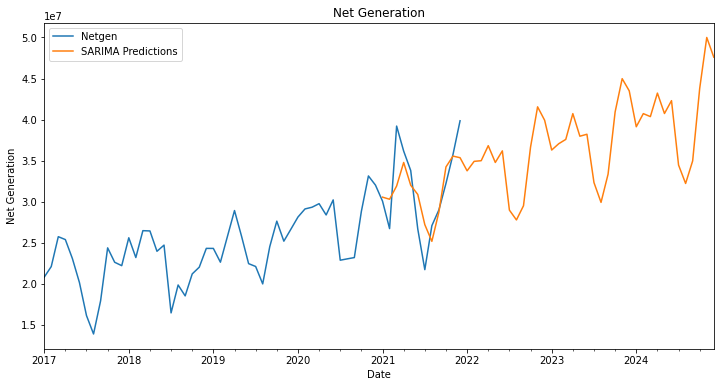

In [149]:
# plot whole length of data with prediction
ax = df_monthly_2017_2021_wt_ws['Netgen'].plot(legend=True, figsize=(12, 6), title='Net Generation')
predictions.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel='Date', ylabel='Net Generation')


In [131]:
# evaluate
from sklearn.metrics import mean_squared_error


error = mean_squared_error(test['Netgen'], predictions)
root_error = np.sqrt(error)
root_error

5147061.063345149

In [143]:
order = [(0, 0, 0), (1, 0, 0), (0, 0, 1), (1, 0, 1), (2, 0, 1), (1, 0, 2), (2, 0, 2),
         (0, 1, 0), (1, 1, 0), (0, 1, 1), (1, 1, 1), (2, 1, 1), (1, 1, 2), (2, 1, 2),
         (0, 2, 0), (1, 2, 0), (0, 2, 1), (1, 2, 1), (2, 2, 1), (1, 2, 2), (2, 2, 2)]
seasonal_order = [(0, 0, 0, 12), (1, 0, 0, 12), (0, 0, 1, 12), (1, 0, 1, 12), (2, 0, 1, 12), (1, 0, 2, 12), (2, 0, 2, 12),
                  (0, 1, 0, 12), (1, 1, 0, 12), (0, 1, 1, 12), (1, 1, 1, 12), (2, 1, 1, 12), (1, 1, 2, 12), (2, 1, 2, 12),
                  (0, 2, 0, 12), (1, 2, 0, 12), (0, 2, 1, 12), (1, 2, 1, 12), (2, 2, 1, 12), (1, 2, 2, 12), (2, 2, 2, 12)]

In [144]:
# loop sarima order and seasonal order
order_list = []
seasonal_order_list = []
error_list = []

for i in order:
    for j in seasonal_order:
        model = SARIMAX(train['Netgen'], order=i, seasonal_order=j)
        results = model.fit()
        start = '2021-01-31'
        end = '2021-12-31'
        predictions = results.predict(start, end, typ='levels').rename('SARIMA Predictions')
        error = mean_squared_error(test['Netgen'], predictions)
        root_error = np.sqrt(error)
        order_list.append(i)
        seasonal_order_list.append(j)
        error_list.append(root_error)

c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as 

In [145]:
df_sarima_results = pd.DataFrame({'order': order_list, 'seasonal_order': seasonal_order_list, 'error': error_list})

In [146]:
df_sarima_results.sort_values(by='error', ascending=True)

,order,seasonal_order,error
185,"(1, 1, 0)","(1, 2, 1, 12)",3.502505e+06
290,"(2, 1, 2)","(1, 2, 1, 12)",3.629210e+06
164,"(0, 1, 0)","(1, 2, 1, 12)",3.636508e+06
138,"(2, 0, 2)","(1, 1, 2, 12)",3.681272e+06
376,"(1, 2, 1)","(1, 2, 2, 12)",3.684910e+06
...,...,...,...
309,"(0, 2, 0)","(1, 2, 0, 12)",3.572733e+07
311,"(0, 2, 0)","(1, 2, 1, 12)",3.682997e+07
313,"(0, 2, 0)","(1, 2, 2, 12)",4.086059e+07
312,"(0, 2, 0)","(2, 2, 1, 12)",4.676245e+07


In [147]:
df_sarima_results.to_csv(r"C:\Users\danie\Downloads\sprint\sarima_results.csv")

In [150]:
# groupby by year and sum
df_yearly_2017_2021_wt_ws = df_monthly_2017_2021_wt_ws.groupby(pd.Grouper(freq='Y')).sum()

# group prediction by year and sum
predictions_yearly = predictions.groupby(pd.Grouper(freq='Y')).sum()


In [169]:
df_yearly_2017_2021_wt_ws_netgen = df_yearly_2017_2021_wt_ws['Netgen'].head()

In [170]:
predictions_yearly.head()

2021-12-31    3.766141e+08
2022-12-31    4.157703e+08
2023-12-31    4.528129e+08
2024-12-31    4.894935e+08
Freq: A-DEC, Name: SARIMA Predictions, dtype: float64

In [171]:
# concat prediction[ minus first year] and actual
df_yearly_2017_2021_wt_ws_netgen = pd.concat([df_yearly_2017_2021_wt_ws_netgen, predictions_yearly[1:]])

In [172]:
df_yearly_2017_2021_wt_ws_netgen = pd.DataFrame(df_yearly_2017_2021_wt_ws_netgen, columns=['Netgen'])

In [173]:
df_yearly_2017_2021_wt_ws_netgen

,Netgen
2017-12-31,2.543027e+08
2018-12-31,2.726675e+08
2019-12-31,2.958829e+08
2020-12-31,3.379380e+08
2021-12-31,3.781968e+08
2022-12-31,4.157703e+08
2023-12-31,4.528129e+08
2024-12-31,4.894935e+08


In [174]:
# calculated % change
df_yearly_2017_2021_wt_ws_netgen['%_change'] = df_yearly_2017_2021_wt_ws_netgen['Netgen'].pct_change()

In [175]:
df_yearly_2017_2021_wt_ws_netgen

,Netgen,%_change
2017-12-31,2.543027e+08,NaN
2018-12-31,2.726675e+08,0.072216
2019-12-31,2.958829e+08,0.085142
2020-12-31,3.379380e+08,0.142134
2021-12-31,3.781968e+08,0.119130
2022-12-31,4.157703e+08,0.099349
2023-12-31,4.528129e+08,0.089094
2024-12-31,4.894935e+08,0.081006
